# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:




## 1. Show DataFrame info.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv(r"files_for_lab\csv_files\marketing_customer_analysis.csv")
data.T

,0,1,2,3,4,5,6,7,8,9,...,9124,9125,9126,9127,9128,9129,9130,9131,9132,9133
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268,OC83172,XZ87318,CF85061,DY87989,BQ94931,...,CB59349,RX91025,AC13887,TF56202,YM19146,LA72316,PK87824,TD14365,UP19263,Y167826
State,Washington,Arizona,Nevada,California,Washington,Oregon,Oregon,Arizona,Oregon,Oregon,...,California,California,California,California,California,California,California,California,California,California
Customer Lifetime Value,2763.52,6979.54,12887.4,7645.86,2813.69,8256.3,5380.9,7216.1,24127.5,7388.18,...,16261.6,19872.3,4629,5032.17,4100.4,23406,3096.51,8163.89,7524.44,2611.84
Response,No,No,No,No,No,Yes,Yes,No,Yes,No,...,No,No,No,No,No,No,Yes,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic,Basic,Basic,Premium,Basic,Extended,...,Extended,Premium,Basic,Basic,Premium,Basic,Extended,Extended,Extended,Extended
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor,College,Master,Bachelor,College,...,Master,High School or Below,Bachelor,College,College,Bachelor,College,Bachelor,College,College
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11,1/25/11,2/24/11,1/18/11,1/26/11,2/17/11,...,1/20/11,1/31/11,1/9/11,2/12/11,1/6/11,2/10/11,2/12/11,2/6/11,2/3/11,2/14/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed,Employed,Employed,Unemployed,Medical Leave,Employed,...,Employed,Unemployed,Unemployed,Employed,Employed,Employed,Employed,Unemployed,Employed,Unemployed
Gender,F,F,F,M,M,F,F,M,M,F,...,M,M,M,M,F,M,F,M,M,M
Income,56274,0,48767,0,43836,62902,55350,0,14072,28812,...,60646,0,0,66367,47761,71941,21604,0,21941,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## 2. Describe DataFrame.


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


## 3. How a plot of the total number of responses.


<AxesSubplot:xlabel='Response', ylabel='Count'>

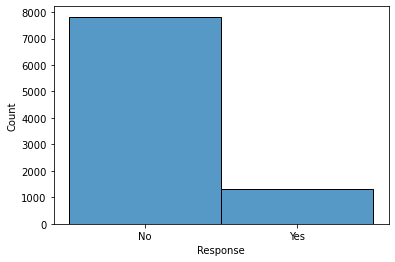

In [6]:
sns.histplot(data["Response"])

## 4. Show a plot of the response rate by the sales channel.


<AxesSubplot:xlabel='Sales Channel', ylabel='Count'>

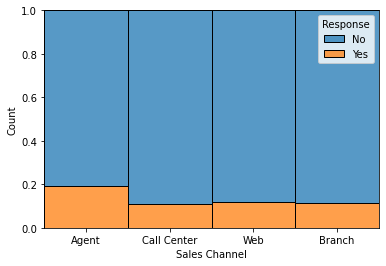

In [7]:
sns.histplot(x = "Sales Channel", hue = "Response", multiple = "fill", data=data)

## 5. Show a plot of the response rate by the total claim amount.


<AxesSubplot:xlabel='Total Claim Amount', ylabel='Count'>

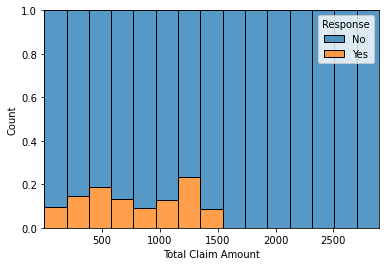

In [19]:
sns.histplot(x = "Total Claim Amount", hue = "Response", multiple = "fill", data=data, bins=15)

## 6. Show a plot of the response rate by income.

<AxesSubplot:xlabel='Income', ylabel='Count'>

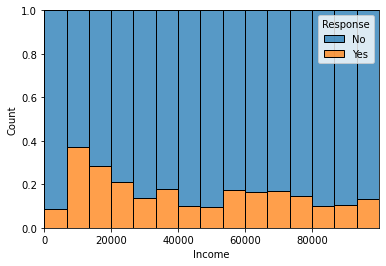

In [18]:
sns.histplot(x = "Income", hue = "Response", multiple = "fill", data=data, bins=15)